CS7317 Using Machine Learning Tools 2020, Assignment 2: Breast Cancer Classification

This is the template for the submission of Assignment 2. Keep the numbering, headings and sequence intact. Add the code and text answers (Markdown cells) below the respective numbered heading.

Student name:
Student ID:

Initialise environment, libraries, settings, etc.:

In [2]:
# code here
#Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

Load the data set:

In [6]:
# code here
from sklearn.datasets import load_breast_cancer
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df
data_sk = load_breast_cancer()
data_DT = sklearn_to_df(data_sk)
data_SVM = data_DT.copy()
data_sk.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance,

1	Understand the dataset (15%)

1.1	Question: Briefly describe what each of the 10 parameters of the cell nuclei mean, using the documentation of the dataset and the example image in Figure 1. What could be the reasons for using the mean, standard error and maximum of each of the 10 parameters?

Answer:

1.2	Plot histograms of each of the 30 features, using two distributions, one for each class, in each diagram. Use 3 figures with 10 subplots each.

In [7]:
# code here
df_mean = data_DT[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension','target']]

df_error = data_DT[['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error','target']]

df_worst = data_DT [['worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']]


df_mean_plot = df_mean.melt(['target'], var_name='cols',  value_name='vals')
df_error_plot = df_error.melt(['target'], var_name='cols',  value_name='vals')
df_worst_plot = df_worst.melt(['target'], var_name='cols',  value_name='vals')

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


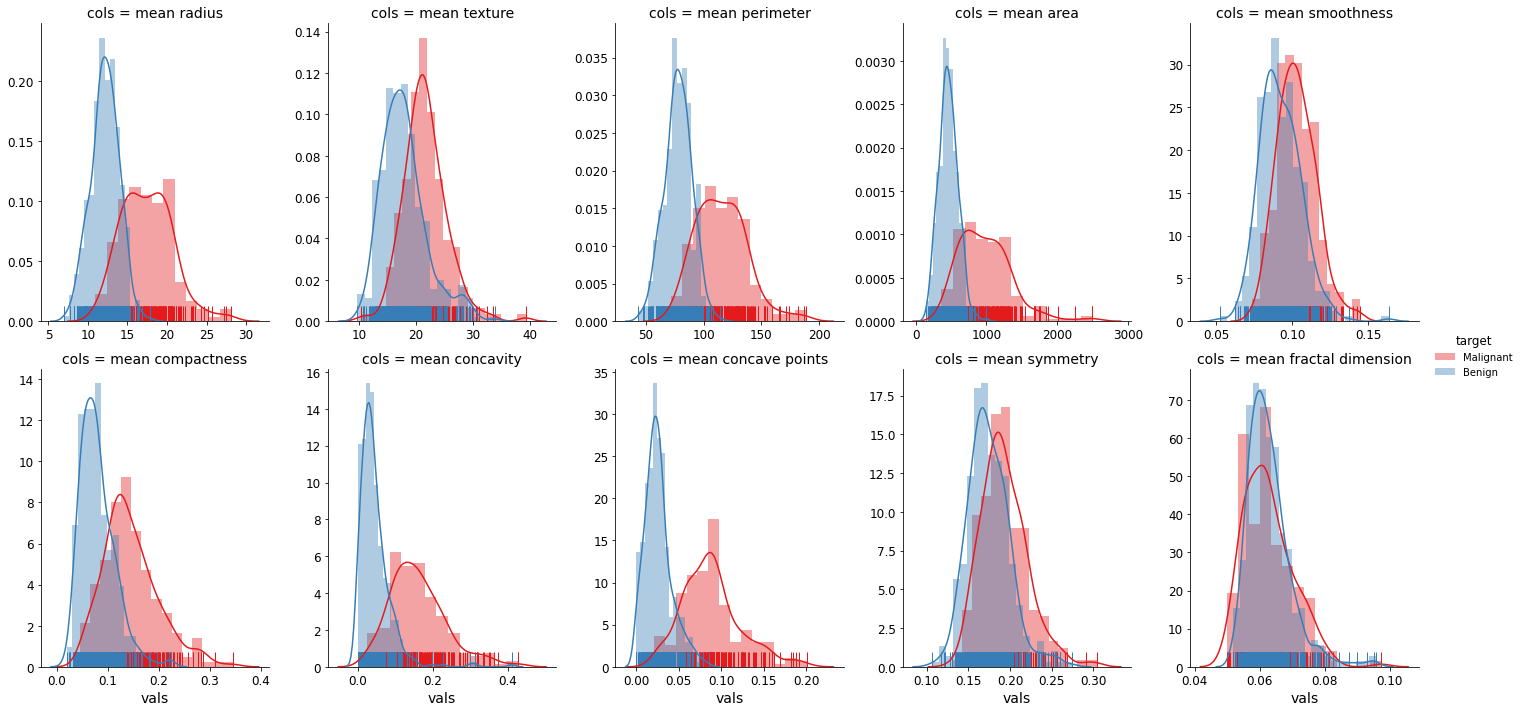

In [18]:
g_mean = sns.FacetGrid(df_mean_plot, col='cols', hue="target", palette="Set1",
                       sharex=False, sharey=False, col_wrap=5 , height=5, aspect=0.8)
g_mean = (g_mean.map(sns.distplot, "vals", hist=True, rug=True))
g_mean.add_legend(labels=['Malignant','Benign'])

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


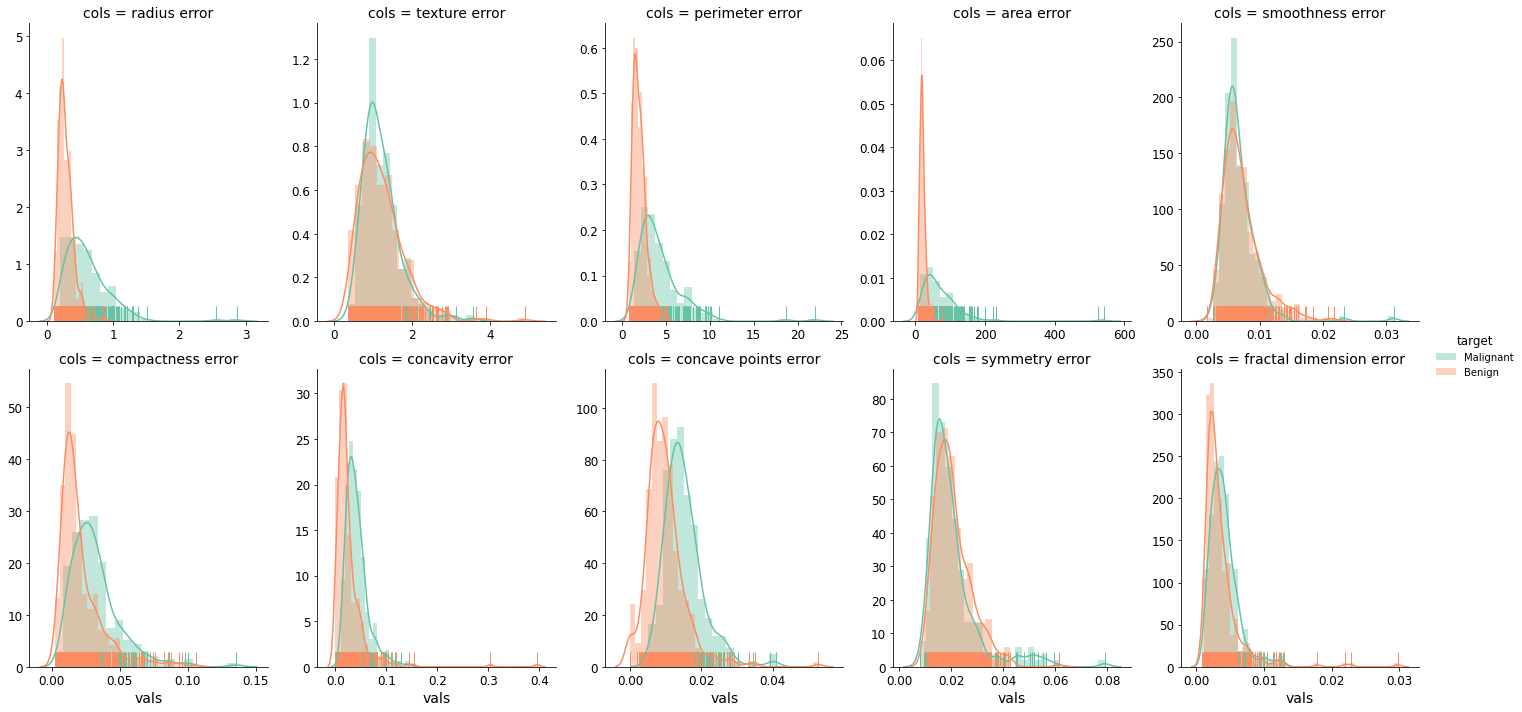

In [22]:
g_error = sns.FacetGrid(df_error_plot, col='cols', hue="target", palette="Set2",
                       sharex=False, sharey=False, col_wrap=5, height=5, aspect=0.8)
g_error = (g_error.map(sns.distplot, "vals", hist=True, rug=True))
g_error.add_legend(labels=['Malignant','Benign'])

/home/roasted_kernel/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:98: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


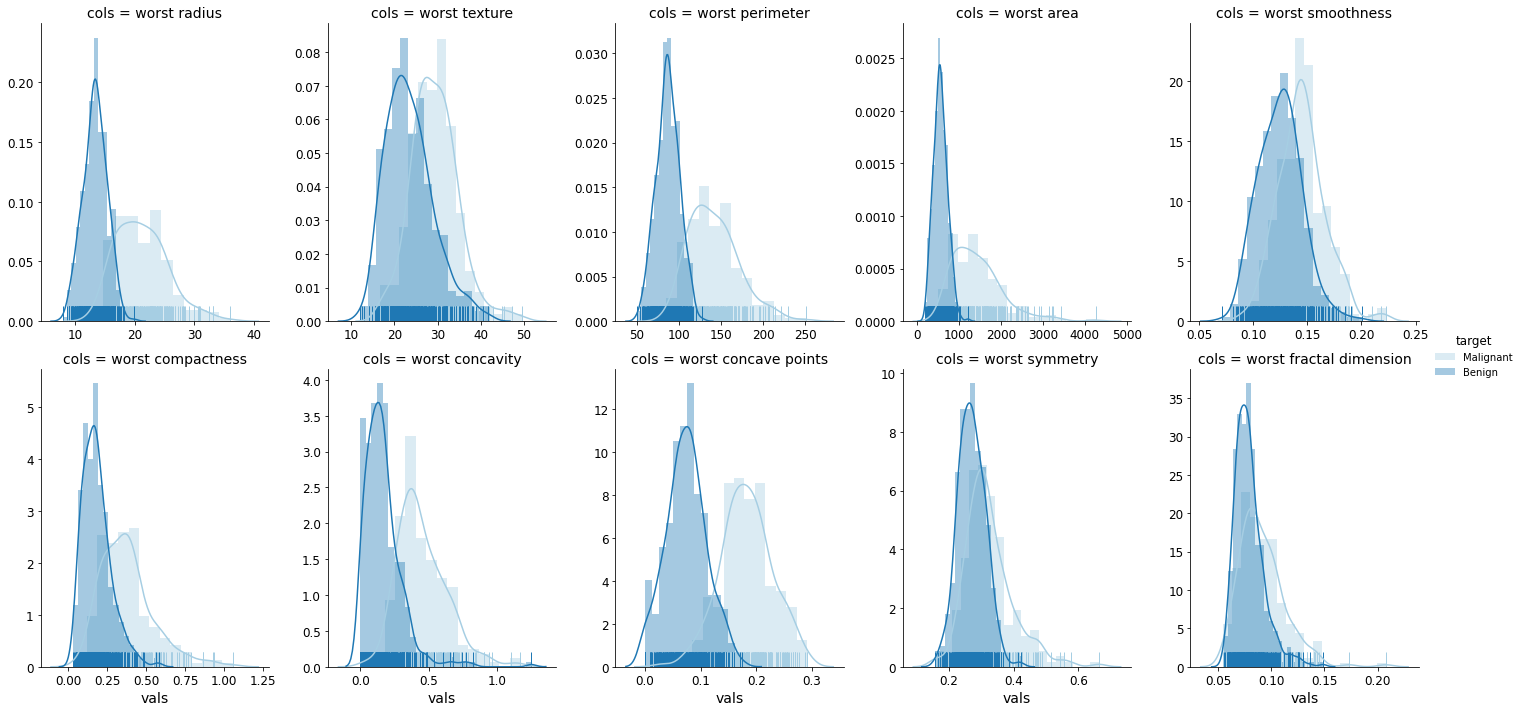

In [27]:
g_worst = sns.FacetGrid(df_worst_plot, col='cols', hue="target", palette="Paired",
                       sharex=False, sharey=False, col_wrap=5, height=5, aspect=0.8)
g_worst = (g_worst.map(sns.distplot, "vals", hist=True, rug=True))
g_worst.add_legend(labels=['Malignant','Benign'])

Answer:

1.3	Plot receiver-operating-characteristic (ROC) curves of the individual features into 3 figures, one figure for each of the groups of 10.

IndexError: invalid index to scalar variable.

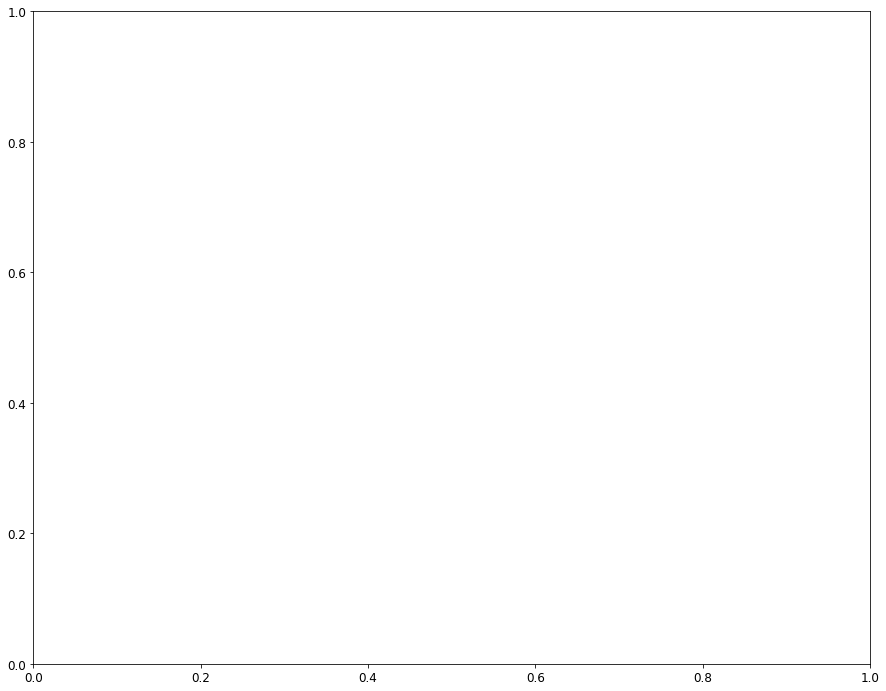

In [33]:
# code here
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr, label, df):
    roc_auc = roc_auc_score(df_mean["target"], df_mean[i])
    plt.plot(fpr, tpr, linewidth=2, label=label  % roc_auc["label"])
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1.1])                                    
    plt.xlabel('Benign', fontsize=16) 
    plt.ylabel('Malignant', fontsize=16)  
    plt.legend()
    plt.grid(True)
    
fig, ax = plt.subplots(figsize=(15,12))
for i in df_mean:
    fpr, tpr, thresholds = roc_curve(df_mean["target"], df_mean[i], pos_label= 0)
    plot_roc_curve(fpr, tpr, str(i),df_mean)
    
fig, ax = plt.subplots(figsize=(15,12))
for i in df_error:
    fpr, tpr, thresholds = roc_curve(df_error["target"], df_error[i], pos_label= 0)
    plot_roc_curve(fpr, tpr, str(i),df_error)
    
fig, ax = plt.subplots(figsize=(15,12))
for i in df_worst:
    fpr, tpr, thresholds = roc_curve(df_worst["target"], df_worst[i], pos_label= 0)
    plot_roc_curve(fpr, tpr, str(i),df_worst)


1.4	Question: Which of the parameters seems promising based on the histograms and ROC curves? Justify your choice while referring to the particular features in the figures that indicate a good separation. Choose your top five candidate features.

Answer: 

1.5	Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [ ]:
# code here

2	Train a decision tree classifier (15%)

2.1	Construct a decision tree classifier using the gini criterion and random_state=0. Below, you will perform a hyper parameter search of max_depth and min_samples_leaf. Check the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [ ]:
# code here

Answer:

2.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for decision tree classification? Are the different class sizes a problem, and if so what are you doing about it?

In [ ]:
# code here

In [ ]:
Answer:

2.3	Perform a grid search using five-fold cross validation over values of the maximum depth (max_depth) and the minimum number of samples per leaf (min_samples_leaf). Choose the value range yourself. Question: What is the rationale for your choice?

In [ ]:
# code here

Answer:

3	Evaluate the decision tree classifier (20%)

3.1	Calculate the confusion matrix, precision and recall of the final classifier. Question:  Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of the classifier?

In [ ]:
# code here

Answer:

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

In [ ]:
# code here

In [ ]:
Answer:

3.3	Display the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

In [ ]:
# code here

3.4	Question: Is the class differentiation well characterised by the node thresholds or is it modelling the boundary using a rigid or stair case pattern? Why are there few 2D scatterplots with only one class shown as prediction contour?

Answer:

4	Train a support vector classifier with RBF kernel (15%)

4.1	Construct a support vector classifier with a radial basis function kernel. Below, you will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keep the default value or select a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [ ]:
# code here

Answer:

4.2	Build a pipeline including any pre-processing steps that you think are necessary. Question: Do the data need to be scaled for support vector classification? Are the different class sizes a problem, and if so what are you doing about it?

In [ ]:
# code here

In [ ]:
Answer:

4.3	Perform a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. Choose the value ranges yourself. Question: What is the rationale for your choice?

In [ ]:
# code here

In [ ]:
Answer:

5	Evaluate the support vector classifier (20%)

5.1	Calculate the confusion matrix, precision and recall of the final classifier. Question: Based on these metrics, what is the chance of failing to detect a sample with cancer? What are the strengths and weaknesses of this classifier?

In [ ]:
# code here

Answer:

5.2	Display the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, use a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

In [ ]:
# code here

Answer:

5.3	Question: What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

Answer:

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer:

6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

Answer: 

6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer: